In [1]:
from scipy import constants
from math import sqrt, ceil, floor, asin, exp, factorial, sin
import matplotlib.pyplot as plt
import numpy as np

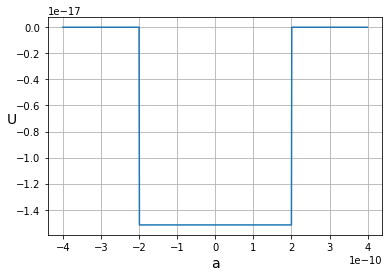

In [2]:
# Потенциальная энергия взята как 13.6 эВ -> электрон на первой орбите атома водорода
U = 15.168e-18

# a была вычислена опытным путем
a = 2e-10

def f(U, x, a):
    return -U if (abs(x) < a) else 0

xMin = -a - a
xMax = a + a
x = np.arange(xMin, xMax, 1e-12)

y = []

for i in range(len(x)):
    y.append(f(U, x[i], a))

plt.plot(x, y)
plt.xlabel("a", fontsize=14)
plt.ylabel("U", rotation=0, fontsize=14)
plt.grid()
plt.show()

In [3]:
# Максимальное значение k_2 в уравнении Шредингера
# Оно восходит к тому, что аргумент arcsin в следующем блоке должен быть не больше 1 
kMax = 1 / constants.hbar * sqrt(2 * constants.electron_mass * U)
print(kMax) 

49847972030.56564


[13050000000.0, 25930000000.0, 38340000000.0, 48980000000.0]


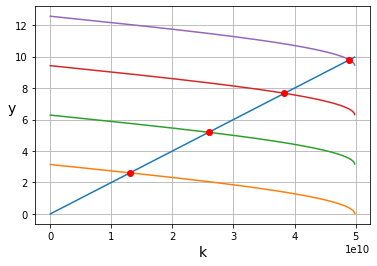

In [4]:
# Графически решим уравнение:
# k_2 * a = pi * n - 2 * arcsin((hbar * k_2)/sqrt(2 * m * U)),
# n = 1, 2, 3...

# Функция прямой (левой части уравнения)
left = np.arange(0, kMax, 1e7) * a

# Найдем количество видимых правых частей 
# Высота правой части равна pi, значит количество видимых частей будет:
# ceil(kMax * a / pi)
visibleCurves = ceil(kMax * a / constants.pi)

# Массив свзяанных значений
# Связанное значение — значение коэффициента k_2 = sqrt(2 * m * E / pow(hbar, 2))
relatedValues = []

plt.plot(np.arange(0, kMax, 1e7), left)

for n in range(1, visibleCurves + 1):
    x_1 = []
    y_1 = []
    for k_2 in range(0, int(kMax), int(1e7)):
        x_1.append(k_2)
        right = constants.pi * n - 2 * asin((constants.hbar * k_2) / sqrt(2 * constants.electron_mass * U))
        y_1.append(right)
        
    
    plt.plot(x_1, y_1)
    for index in range(len(y_1)):
        value = abs(left[index] - y_1[index])
        previousValueX = relatedValues[len(relatedValues) - 1] / 1e7 if len(relatedValues) > 0 else -1
        previousValueY = y_1[index - 1] if index > 0 and len(y_1) > 0 else -1
        isCorrectByX = abs(index - previousValueX) > 5 if previousValueX > -1 else True
        isCorrectByY = abs(y_1[index] - previousValueY) > 0.5 if previousValueY > -1 else True
        
        if (value < 0.004 and (isCorrectByX or isCorrectByY)):
            relatedValues.append(index * 1e7)
            plt.plot(index * 1e7, y_1[index], 'ro')

print(relatedValues)
plt.xlabel("k", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14)
plt.grid()
plt.show()

1.0395714747759467e-18
4.104293070745186e-18
8.972997524682033e-18
1.4644376721863024e-17


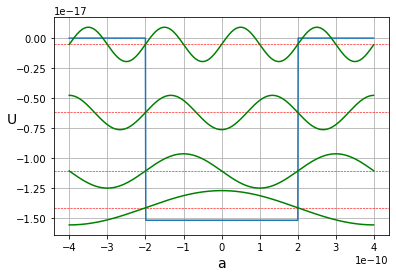

In [5]:
# Вычислим энергии из найденных значений k и отметим их на графике
energies = [0] * len(relatedValues)

plt.plot(x, y)

# Определим пси-функцию
def psi(x_0, n):
    # Просто коэффициент, чтобы функции красиво выглядели
    coefficient = 70000000000000000000000
    # И еще немного коэффициентов: делим значения на 2 и сдвигаем на pi * n / 2
    return sqrt(2 / a) * sin(((constants.pi * (n + 1) * (x_0) / a) / 2) + (n + 1) * constants.pi / 2) / coefficient

for index in range(len(relatedValues)):
    energies[index] = (constants.hbar ** 2) * relatedValues[index] ** 2 / (2 * constants.electron_mass)
    plt.axhline(y=energies[index] - U, linestyle="--", c='red', linewidth = 0.6)
    
    # Нарисуем на графике графики волновых функций
    yPsi = []
    for xIndex in range(len(x)):
        yPsi.append(psi(x[xIndex], index) + (energies[index] - U))
    
    plt.plot(x, yPsi, c='green')
    print(energies[index])

plt.xlabel("a", fontsize=14)
plt.ylabel("U", rotation=0, fontsize=14)
plt.grid()
plt.show()

In [6]:
# Построим график осцилляторного потенциала
def pot(omega, x_3):
    return 0.5 * constants.electron_mass * pow(omega, 2) * pow(x_3, 2)

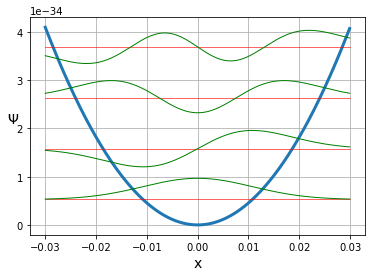

[5.272859088230782e-35, 1.5818577264692348e-34, 2.636429544115391e-34, 3.6910013617615478e-34]


In [7]:
x = np.arange(-3e-2, 3e-2, 1e-4)
#x = np.arange(-3, 3, 0.1)
y = []
omega = 1
alpha = constants.electron_mass * omega / constants.hbar

for index in range(len(x)):
    y.append(pot(omega, x[index]))
    
plt.plot(x, y, linewidth=3)

# Определим функцию для Эрмитова многочлена
def hermite(n, x):
    array = [0] * (n) + [1]
    hermite = np.polynomial.hermite.Hermite(array)
    return hermite(x * sqrt(alpha))

# График собственных функций осциллографа
def oscillographFunctions(n, x, E):
    points = []
    for index in range(len(x)):
        norm = constants.electron_mass / 150000 # Коэффициент нормализации, чтобы графики получились не огромные
        coefficient = 1 / (sqrt(pow(2, n) * factorial(n))) * pow((alpha / constants.pi), 0.25)
        point = norm * coefficient * exp(-0.5 * alpha * pow(x[index], 2)) * hermite(n, x[index]) + E # + E чтобы поднять график на определенную высоту
        points.append(point)
        
    return points

# Нарисуем линии энергетических уровней
# Собственные значения — значения энергий
ownValues = []

n = 0
while True:
    E = (n + 0.5) * constants.hbar * omega
    
    if (E > y[0]):
        break
    
    ownValues.append(E)
        
    plt.plot(x, [E] * len(x), linewidth=0.6, c='red')
    plt.plot(x, oscillographFunctions(n, x, E), c='green', linewidth = 1)
    n += 1
plt.xlabel("x", fontsize=14)
plt.ylabel("Ψ", rotation=0, fontsize=14)
plt.grid()
plt.show()
print(ownValues)